In [20]:
path = '../cuongdv-round2/logs/solver_v3.log'

In [21]:
import re

In [22]:

with open(path, 'r') as f:
    lines = f.readlines()

print(lines)

['2024-09-21 00:31:33,522 - Solving Seed-2381 - Initial solution: 1088137017.386087\n', '2024-09-21 00:31:33,540 - Solving Seed-9221 - Initial solution: 1095361044.886087\n', '2024-09-21 00:31:33,615 - Solving Seed-6829 - Initial solution: 971615910.3860871\n', '2024-09-21 00:31:33,647 - Solving Seed-8053 - Initial solution: 1255318566.386087\n', '2024-09-21 00:31:33,683 - Solving Seed-9859 - Initial solution: 1327749664.386087\n', '2024-09-21 00:31:33,730 - Solving Seed-6047 - Initial solution: 1002403538.386087\n', '2024-09-21 00:31:33,738 - Solving Seed-8677 - Initial solution: 990697089.886087\n', '2024-09-21 00:31:33,739 - Solving Seed-2521 - Initial solution: 928377523.3860871\n', '2024-09-21 00:31:33,749 - Solving Seed-5351 - Initial solution: 1031477793.8860871\n', '2024-09-21 00:31:33,755 - Solving Seed-1097 - Initial solution: 1137912031.886087\n', '2024-09-21 00:32:23,167 - Solving Seed-9859 - Removed 927 servers with total gain 17166385.761304855\n', '2024-09-21 00:32:23,16

In [23]:
def process_msg(msg):
    words = msg.split(' ')
    action = words[0]
    if words[0] in ('Removed', 'Added', 'Merged'):
        value = float(words[6])
        addition_value = int(words[1])
    elif words[0] == 'Initial':
        value = float(words[2])
        addition_value = None
    elif words[0] == 'New':
        value = float(words[3])
        addition_value = None
    elif words[0] == 'Optimized':
        value = float(words[5])
        addition_value = None
    else:
        print(msg)

    return {
        'action': action,
        'value': value,
        'addition_value': addition_value,
    }


In [24]:
seeds = {}
## init
pattern = r'(\d{4}-\d{2}-\d{2}) (\d{2}:\d{2}:\d{2},\d{3}) - (.+?) - (.+)'
for line in lines:
    match = re.match(pattern, line)
    if match:
        date = match.group(1)
        time = match.group(2)
        seed = match.group(3)
        message = match.group(4)
        if seed not in seeds:
            seeds[seed] = []
        action = process_msg(message)
        seeds[seed].append((date, time, action))

In [25]:
# keys = [
#     'Removed',
#     'Added',
#     'Merged',
#     'Initial solution',
#     'Optimized selling prices with gain',
#     'New best solution: '

# ]


# # Removed 4418 servers with total gain 90310206.3448565
# # Added 23831 servers with total gain 610599164.3234487
# # Merged 363 servers with total gain 2474552.88818264
# # Initial solution: 1088137017.386087
# # Optimized selling prices with gain 89676294.36457682
# # New best solution: 2009791949.0030189

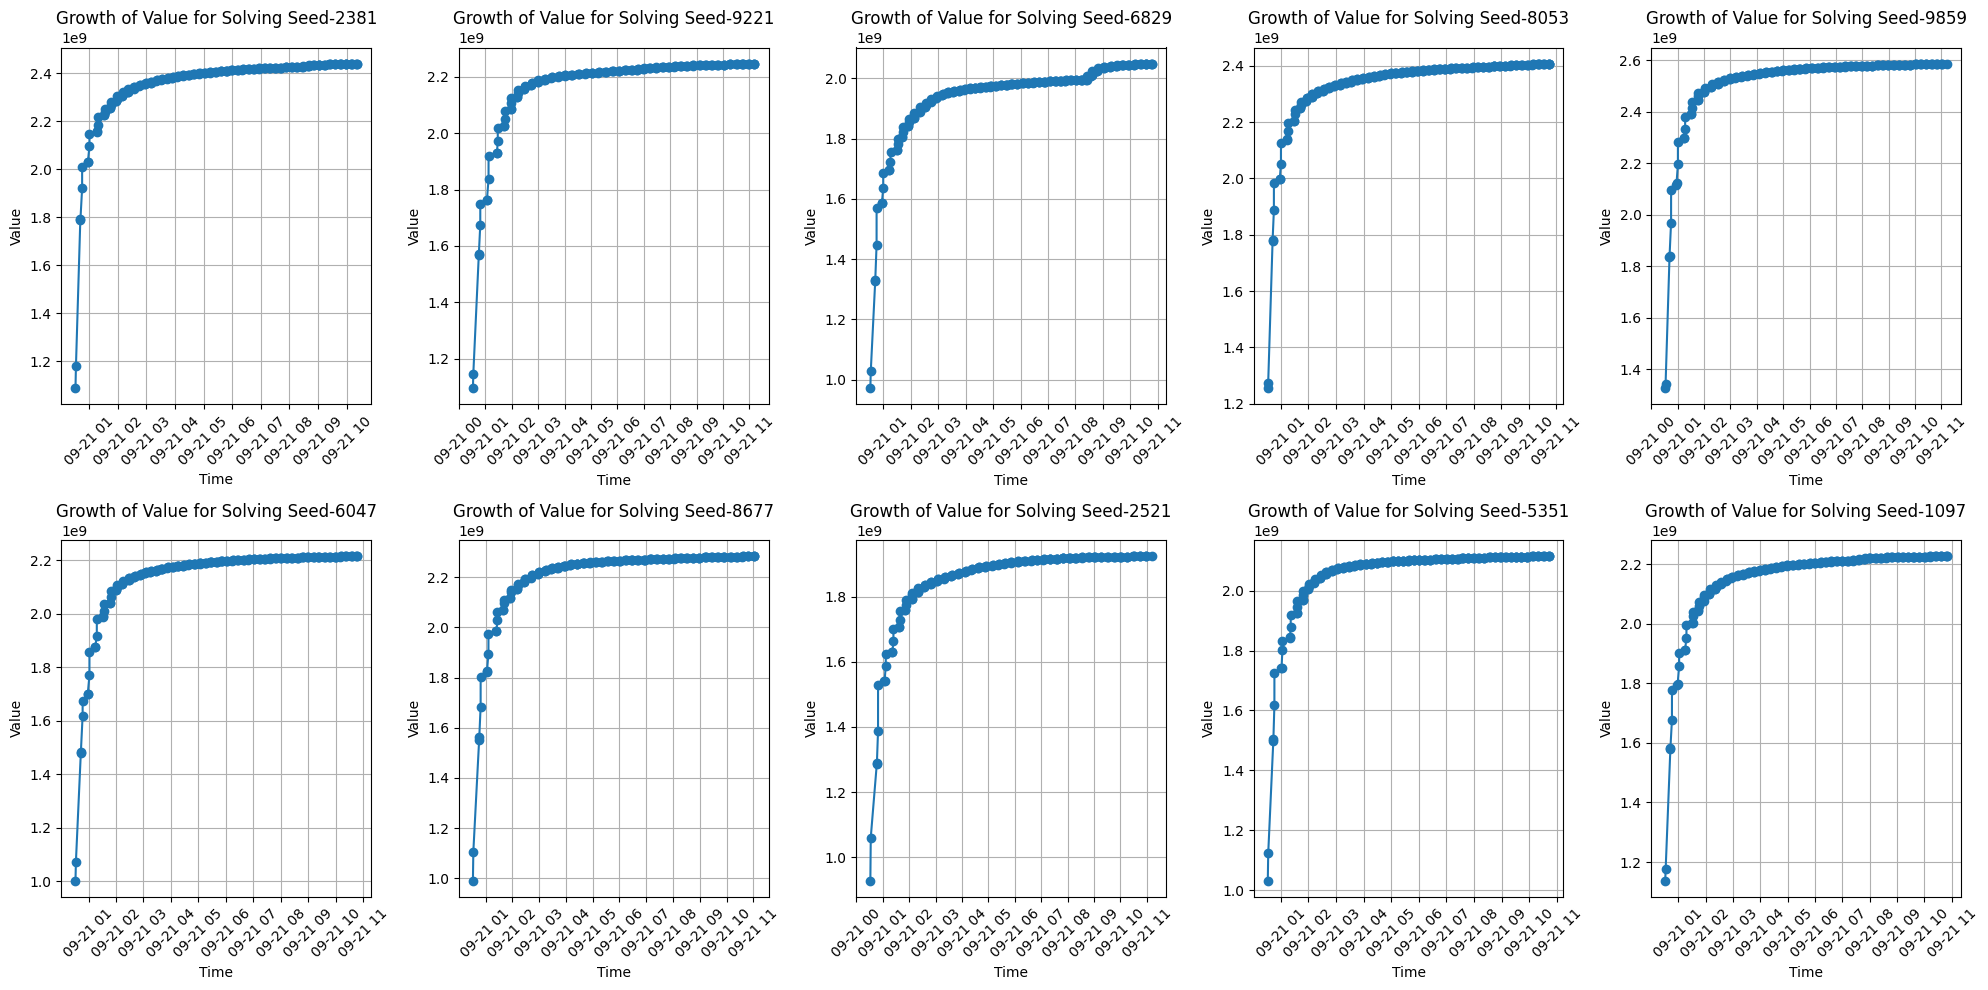

In [33]:
import matplotlib.pyplot as plt
from datetime import datetime
# Chuẩn bị dữ liệu cho đồ thị
times = []
values = []

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()  # Chuyển đổi thành một mảng 1 chiều để dễ dàng truy cập

for idx, seed in enumerate(seeds):
    times = []
    values = []

    for date, time, action in seeds[seed]:
        if action['action'] in ('New', 'Initial'):
            datetime_str = f"{date} {time}"
            time_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S,%f')
            times.append(time_obj)
            values.append(action['value'])

    # Vẽ đồ thị cho seed hiện tại
    axs[idx].plot(times, values, marker='o')
    axs[idx].set_title(f'Growth of Value for {seed}')
    axs[idx].set_xlabel('Time')
    axs[idx].set_ylabel('Value')
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].grid()

# Cải thiện hiển thị
plt.tight_layout()
plt.show()


10